In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import numpy as np 
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import fixed



In [46]:
houseDf = pd.read_csv('house.csv')


### Imovel com data mais antiga?

In [47]:
houseDf['date'] =pd.to_datetime(houseDf['date'])
houseDf.sort_values('date', ascending=True)

# imovel com id 5561000190

id       date      price  bedrooms  bathrooms  sqft_living  \
16768  5561000190 2014-05-02   437500.0         3       2.25         1970   
9596    472000620 2014-05-02   790000.0         3       2.50         2600   
9587   1024069009 2014-05-02   675000.0         5       2.50         2820   
20602  7853361370 2014-05-02   555000.0         4       2.50         3310   
11577  5056500260 2014-05-02   440000.0         4       2.25         2160   
...           ...        ...        ...       ...        ...          ...   
7898   1422700040 2015-05-14   183000.0         3       1.00         1170   
928    8730000270 2015-05-14   359000.0         2       2.75         1370   
5637   7923600250 2015-05-15   450000.0         5       2.00         1870   
13053  5101400871 2015-05-24   445500.0         2       1.75         1390   
16594  9106000005 2015-05-27  1310000.0         4       2.25         3750   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16768     35100     2.0           0     0  ...      9        1970   
9596       4750     1.0           0     0  ...      9        1700   
9587      67518     2.0           0     0  ...      8        2820   
20602      6500     2.0           0     0  ...      8        3310   
11577      8119     1.0           0     0  ...      8        1080   
...         ...     ...         ...   ...  ...    ...         ...   
7898       7320     1.0           0     0  ...      7        1170   
928        1140     2.0           0     0  ...      8        1080   
5637       7344     1.5           0     0  ...      7        1870   
13053      6670     1.0           0     0  ...      6         720   
16594      5000     2.0           0     0  ...      8        2440   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
16768              0      1977             0    98027  47.4635 -121.991   
9596             900      1951             0    98117  47.6833 -122.400   
9587               0      1979             0    98029  47.5794 -122.025   
20602              0      2012             0    98065  47.5150 -121.870   
11577           1080      1966             0    98006  47.5443 -122.177   
...              ...       ...           ...      ...      ...      ...   
7898               0      1962             0    98188  47.4685 -122.282   
928              290      2009             0    98133  47.7052 -122.343   
5637               0      1960             0    98007  47.5951 -122.144   
13053            670      1941             0    98115  47.6914 -122.308   
16594           1310      1924             0    98115  47.6747 -122.303   

       sqft_living15  sqft_lot15  
16768           2340       35100  
9596            2380        4750  
9587            2820       48351  
20602           2380        5000  
11577           1850        9000  
...              ...         ...  
7898            2040        7320  
928             1370        1090  
5637            1870        7650  
13053            920        6380  
16594           2170        4590  

[21613 rows x 21 columns]

### Qual imovel com mais andares?


In [48]:
houseDf['floors'].unique()
### 3.5

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [49]:
houseDf[houseDf['floors'] == 3.5 ][['floors','id']]

floors          id
875       3.5  6306400140
10077     3.5  1972202010
11594     3.5  3180100023
14885     3.5  8673400177
15424     3.5  1702900664
18477     3.5  1346300150
20308     3.5  1972200426
20772     3.5  1972200428

### Nova coluna para alta padrão e baixo padrão 

In [50]:
houseDf['padrão'] = 'standard'

In [51]:
houseDf.loc[houseDf['price'] > 540000, 'padrão'] = 'high_level'
houseDf.loc[houseDf['price'] < 540000, 'padrão'] = 'low_level'
houseDf.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15      padrão  
0        5650   low_level  
1        7639   low_level  
2        8062   low_level  
3        5000  high_level  
4        7503   low_level  

[5 rows x 22 columns]

### Relatório 

In [52]:
report = houseDf[['id','date','price','bedrooms','sqft_lot','padrão']]
report.sort_values('price',ascending=False)

id       date      price  bedrooms  sqft_lot      padrão
7252   6762700020 2014-10-13  7700000.0         6     27600  high_level
3914   9808700762 2014-06-11  7062500.0         5     37325  high_level
9254   9208900037 2014-09-19  6885000.0         6     31374  high_level
4411   2470100110 2014-08-04  5570000.0         5     35069  high_level
1448   8907500070 2015-04-13  5350000.0         5     23985  high_level
...           ...        ...        ...       ...       ...         ...
8274   3883800011 2014-11-05    82000.0         3     10426   low_level
16198  3028200080 2015-03-24    81000.0         2      9975   low_level
465    8658300340 2014-05-23    80000.0         1      5050   low_level
15293    40000362 2014-05-06    78000.0         2     16344   low_level
1149   3421079032 2015-02-17    75000.0         1     43377   low_level

[21613 rows x 6 columns]

In [53]:
report.to_csv('dataset.csv',index=False)

### Mapeamento das casas (lib=plotly e Scatter Mapbox)

In [54]:
import plotly.express as px

data_map = houseDf[['id', 'lat','long','price']]

mapa = px.scatter_mapbox(data_map, lat='lat', lon='long', hover_name='id',hover_data=['price'], color_discrete_sequence=['purple'],zoom=3,height=300 )

mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout(height=600, margin={'r':0,'t':0,'l':0,'b':0})
mapa.show()

In [55]:
mapa.write_html('datasets/map_houses.html')

### Quais os numeros de imoveis por ano de construção?

In [56]:
casas_por_yrbuilt = houseDf['yr_built'].value_counts(ascending=True)
casas_por_yrbuilt

1934     21
1935     24
1902     27
1901     29
1933     30
       ... 
2003    422
2004    433
2005    450
2006    454
2014    559
Name: yr_built, Length: 116, dtype: int64

### Qual o menor numero de quartos por ano de construção?

In [57]:
houseDf[['yr_built','bedrooms']].groupby('yr_built').min()


bedrooms
yr_built          
1900             1
1901             2
1902             2
1903             1
1904             2
...            ...
2011             1
2012             2
2013             2
2014             1
2015             1

[116 rows x 1 columns]

### Qual o preço de compra mais alto por numero de quartos?

In [58]:
houseDf[['price','bedrooms']].groupby('bedrooms').max()

price
bedrooms           
0         1295650.0
1         1247000.0
2         3278000.0
3         3800000.0
4         4489000.0
5         7062500.0
6         7700000.0
7         3200000.0
8         3300000.0
9         1400000.0
10        1148000.0
11         520000.0
33         640000.0

### Qual a soma de todos os preços de compra por numero de quarto?   

In [59]:
houseDf[['price','bedrooms']].groupby('bedrooms').sum()

price
bedrooms              
0         5.323550e+06
1         6.321093e+07
2         1.107789e+09
3         4.580264e+09
4         4.372957e+09
5         1.259346e+09
6         2.245416e+08
7         3.614502e+07
8         1.436600e+07
9         5.363999e+06
10        2.458000e+06
11        5.200000e+05
33        6.400000e+05

### Qual a soma de todos os preços de compra por numero de quarto e banheiros?


In [60]:
houseDf[['bedrooms','bathrooms','price']].groupby(['bedrooms','bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00       3642600.0
         0.75        265000.0
         1.00        228000.0
         1.50        288000.0
         2.50        899950.0
...                       ...
10       2.00        650000.0
         3.00        660000.0
         5.25       1148000.0
11       3.00        520000.0
33       1.75        640000.0

[144 rows x 1 columns]

### Qual o tamanho médio das salas dos imoveis por ano de construção?

In [61]:
houseDf[['sqft_living','yr_built']].groupby('yr_built').mean()
#em pés

sqft_living
yr_built             
1900      1732.011494
1901      1763.620690
1902      1919.629630
1903      1507.739130
1904      1603.177778
...               ...
2011      2313.684615
2012      2378.741176
2013      2636.592040
2014      2615.389982
2015      2596.315789

[116 rows x 1 columns]

### Qual o tamanho mediano das salas dos imoveis por ano de construção?

In [62]:
houseDf[['sqft_living','yr_built']].groupby('yr_built').median()


sqft_living
yr_built             
1900           1540.0
1901           1610.0
1902           1600.0
1903           1505.0
1904           1280.0
...               ...
2011           2270.0
2012           2237.5
2013           2580.0
2014           2650.0
2015           2590.0

[116 rows x 1 columns]

### Qual o desvio padrão do tamanho da sala dos imoveis por ano de construção? 

In [63]:
houseDf[['sqft_living','yr_built']].groupby('yr_built').std()


sqft_living
yr_built             
1900       732.944373
1901       668.231804
1902       878.659300
1903       469.723438
1904      1076.870620
...               ...
2011       804.863521
2012       771.430350
2013       883.499390
2014       893.810049
2015      1155.605425

[116 rows x 1 columns]

### Como é o crescimento medio de compra de imoveis por ano, por dia e pela semana do ano?

In [64]:
houseDf['year'] = pd.to_datetime(houseDf['date']).dt.year #object => timestamps
houseDf.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2             0    98028  47.7379 -122.233           2720        8062   
3             0    98136  47.5208 -122.393           1360        5000   
4             0    98074  47.6168 -122.045           1800        7503   

       padrão  year  
0   low_level  2014  
1   low_level  2014  
2   low_level  2015  
3  high_level  2014  
4   low_level  2015  

[5 rows x 23 columns]

<BarContainer object of 2 artists>

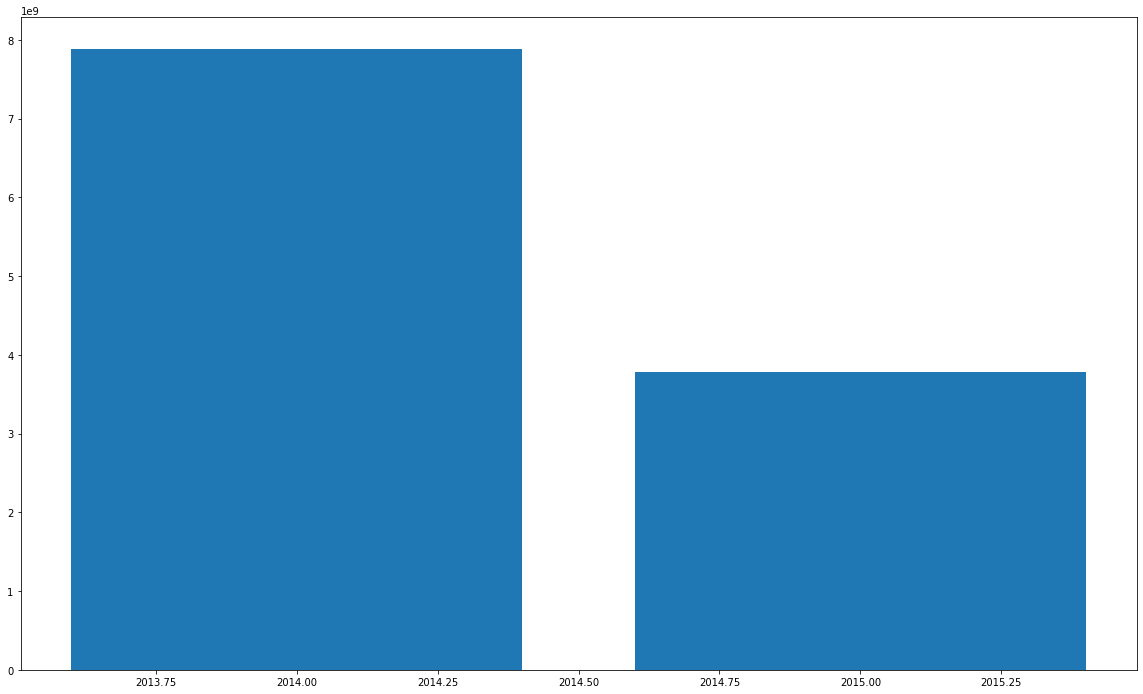

In [65]:
by_year = houseDf[['price','year']].groupby('year').sum().reset_index()
plt.figure(figsize=(20,12))
plt.bar(by_year['year'],by_year['price'])



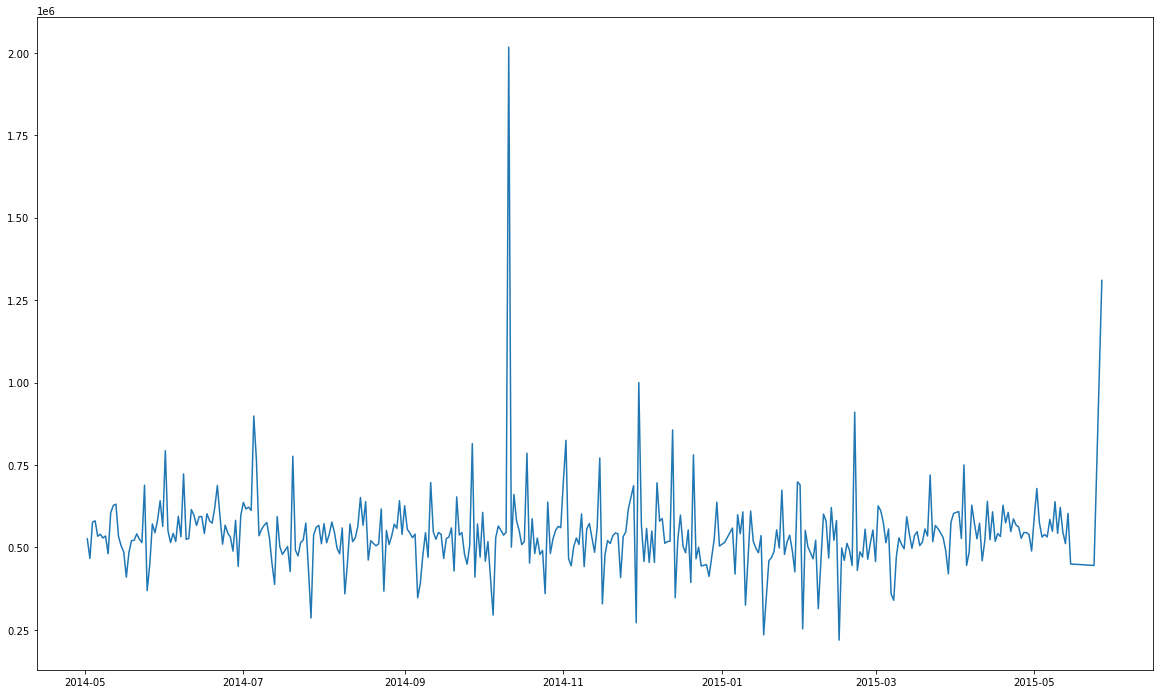

In [66]:
houseDf['day'] = pd.to_datetime(houseDf['date'])
by_day = houseDf[['day','price']].groupby('day').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_day['day'],by_day['price'])

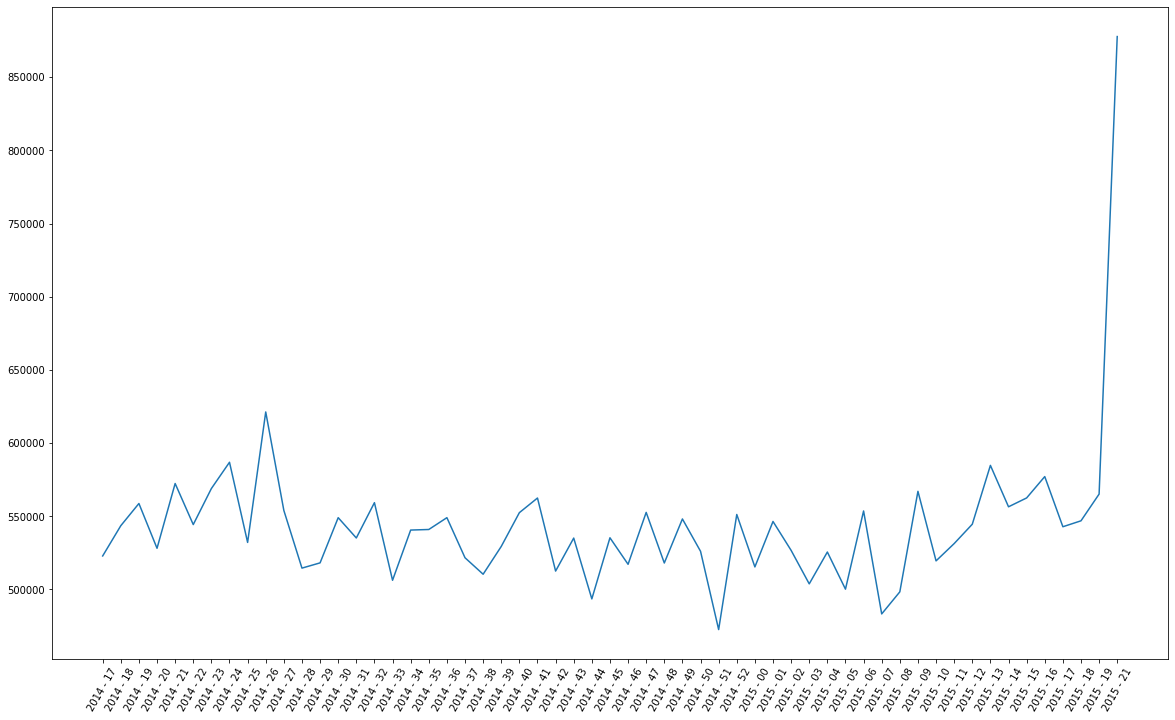

In [67]:
houseDf['year-week'] = pd.to_datetime(houseDf['date']).dt.strftime('%Y - %U')
by_year_week = houseDf[['price','year-week']].groupby('year-week').mean().reset_index()

plt.figure(figsize=(20,12))
plt.xticks(rotation=60)
plt.plot(by_year_week['year-week'], by_year_week['price'])

### Dashboard de vendas

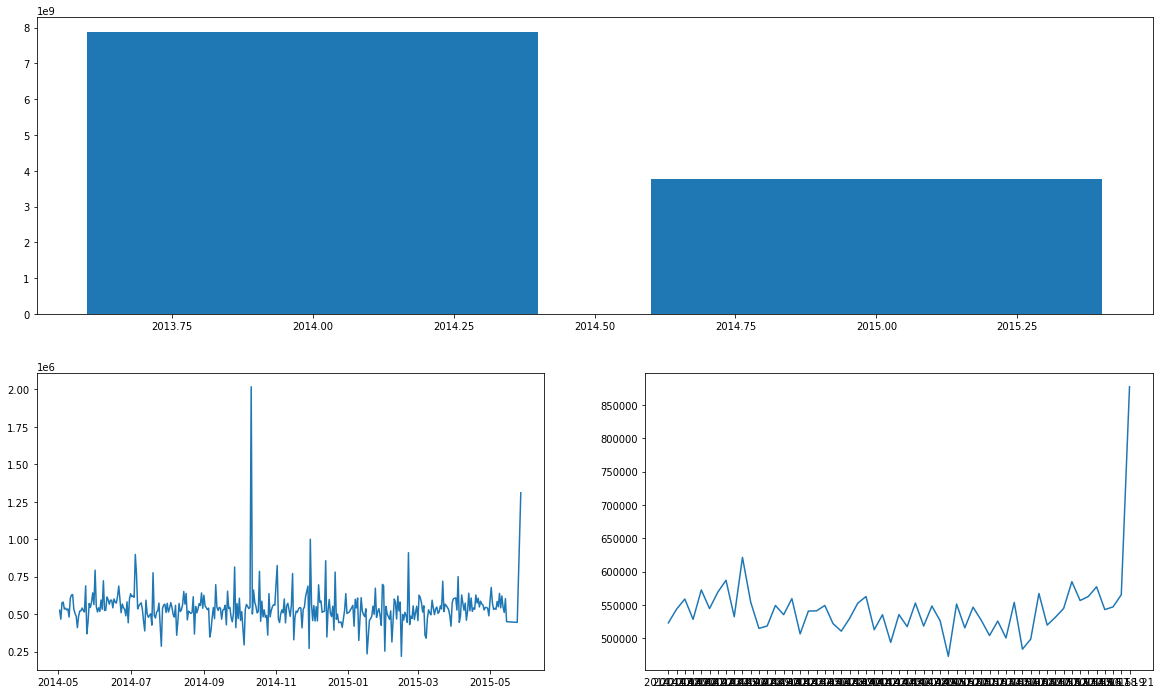

In [68]:
import matplotlib.gridspec as spec

fig = plt.figure(figsize=(20,12))
specs = spec.GridSpec(ncols=2,nrows=2,figure=fig)

ax1 = fig.add_subplot(specs[0,:]) #primeira linha 
ax2 = fig.add_subplot(specs[1,0]) #segunda linha, primeira coluna
ax3 = fig.add_subplot(specs[1,1])

ax1.bar(by_year['year'],by_year['price'])
ax2.plot(by_day['day'],by_day['price'])
ax3.plot(by_year_week['year-week'], by_year_week['price'])

### Mapa com casas com maiores preços

In [69]:
import plotly.express as px

houses = houseDf[['id','lat','long','price']]

mapa_proporção_preço = px.scatter_mapbox(houses, lat='lat',lon='long',size='price',color_continuous_scale=px.colors.cyclical.IceFire,size_max=15,zoom=10)

mapa_proporção_preço.update_layout(mapbox_style ='open-street-map')
mapa_proporção_preço.update_layout(height=600,margin={"r":0,"t":0,"b": 0,"l":0})
mapa_proporção_preço.show()

In [70]:
mapa_proporção_preço.write_html('datasets/map_price.html')

### Criar coluna baseado no numero de quartos: se 1 'studio, se 2 'apartment', se maior que 2 'house'

In [71]:
conditions = [
    (houseDf['bedrooms']<1),
    (houseDf['bedrooms'] < 2) & (houseDf['bedrooms']>0),
    (houseDf['bedrooms'] > 1) & (houseDf['bedrooms']<3),
    (houseDf['bedrooms'] > 2)
]

values = ['any-type','studio', 'apartment', 'house']

houseDf['build_type'] = np.select(conditions, values)
houseDf.head()



id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0           0     0  ...    98178  47.5112 -122.257   
1      7242     2.0           0     0  ...    98125  47.7210 -122.319   
2     10000     1.0           0     0  ...    98028  47.7379 -122.233   
3      5000     1.0           0     0  ...    98136  47.5208 -122.393   
4      8080     1.0           0     0  ...    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15      padrão  year        day  year-week  \
0           1340        5650   low_level  2014 2014-10-13  2014 - 41   
1           1690        7639   low_level  2014 2014-12-09  2014 - 49   
2           2720        8062   low_level  2015 2015-02-25  2015 - 08   
3           1360        5000  high_level  2014 2014-12-09  2014 - 49   
4           1800        7503   low_level  2015 2015-02-18  2015 - 07   

   build_type  
0       house  
1       house  
2   apartment  
3       house  
4       house  

[5 rows x 26 columns]

### Grafico de barras que represente a soma de preços pelo numero de quartos


<BarContainer object of 13 artists>

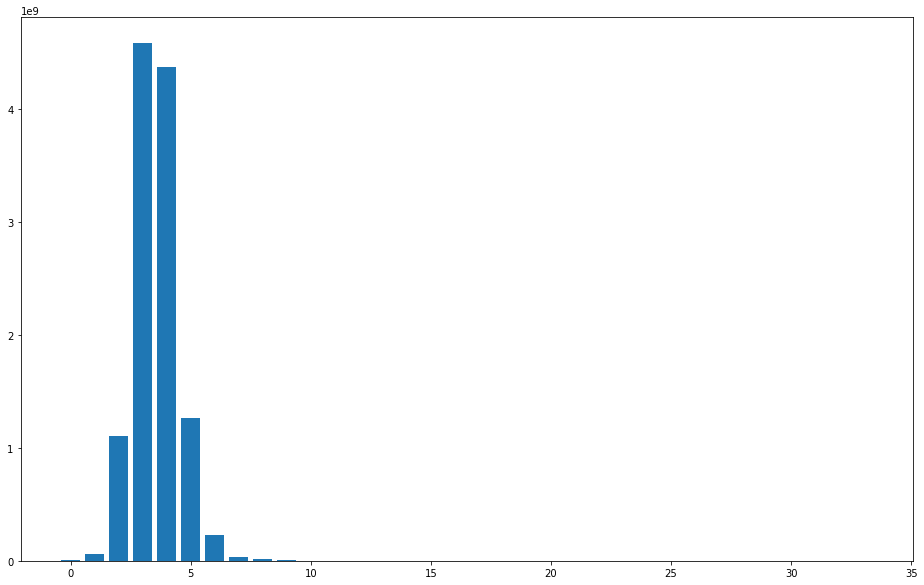

In [72]:
x = houseDf[['bedrooms','price']].groupby('bedrooms').sum().reset_index()
plt.figure(figsize=(16,10))
plt.bar(x['bedrooms'],x['price'])

### Gráfico de linhas que represente a media de preços pelo ano de construção dos imoveis

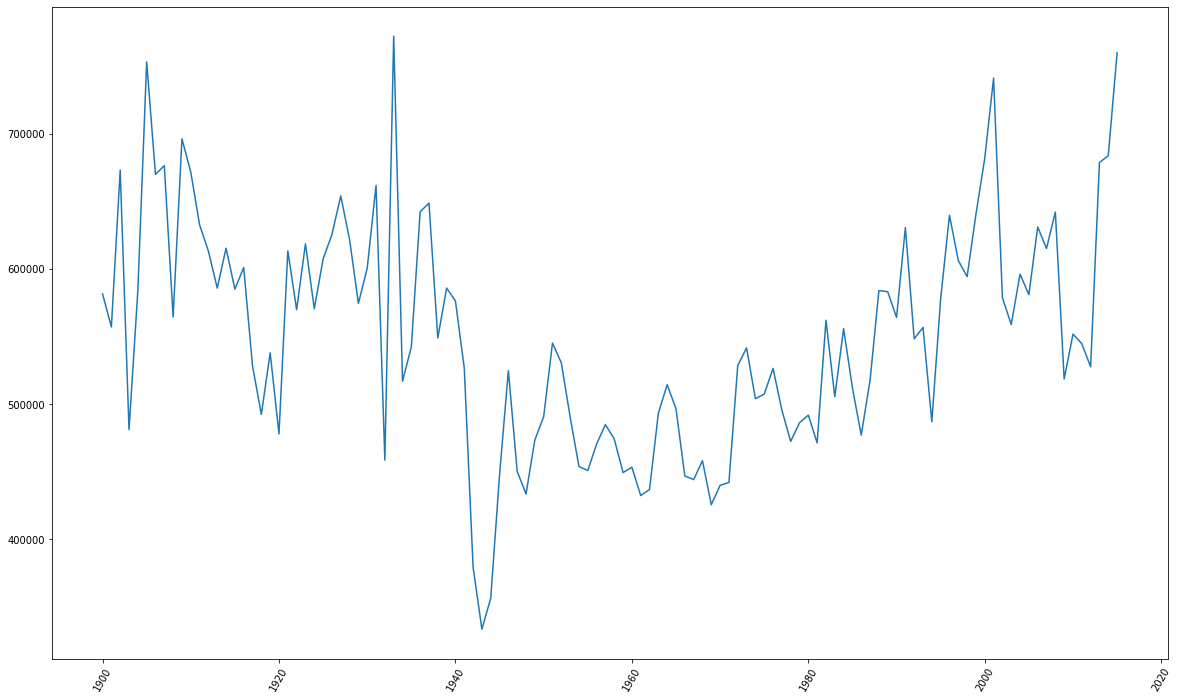

In [73]:
mean_yr_built = houseDf[['yr_built','price']].groupby('yr_built').mean().reset_index()

plt.figure(figsize=(20,12))
plt.xticks(rotation=60)
plt.plot(mean_yr_built['yr_built'], mean_yr_built['price'])


### Faça um grafico de barras que represente a media dos preços pelo tipo dos dormitorios


<BarContainer object of 4 artists>

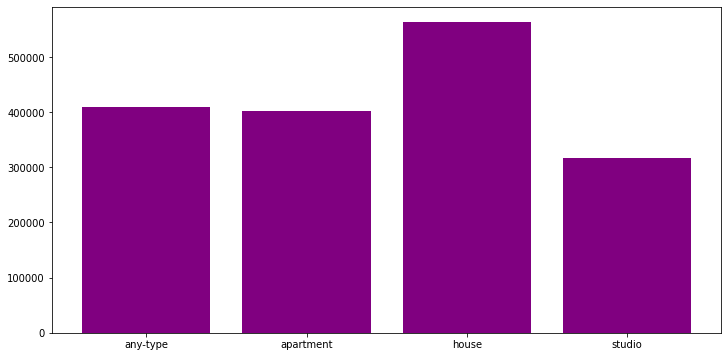

In [74]:
mean_build_type = houseDf[['build_type','price']].groupby('build_type').mean().reset_index()

plt.figure(figsize=(12,6))

plt.bar( mean_build_type['build_type'], mean_build_type['price'],color='purple')

### Faça um gráfico de linhas que represente a media dos preços pelo ano da reforma, a partir de 1930

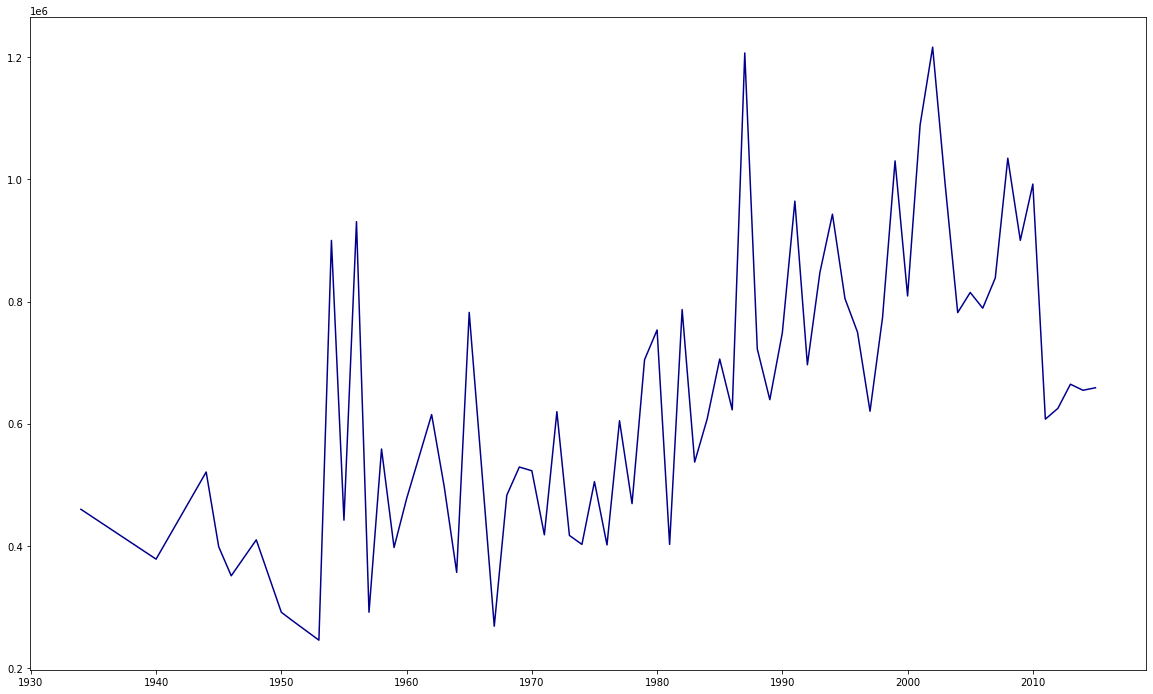

In [75]:
yr_renovated = houseDf.loc[(houseDf['yr_renovated']>1930)][['yr_renovated','price']]
price_by_yr_renovated = yr_renovated.groupby('yr_renovated').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(price_by_yr_renovated['yr_renovated'],price_by_yr_renovated['price'], color='darkblue')


### Faça uma tabela que mostre a media dos preços por ano de construção e tipo de dormitorio dos imoveis

In [76]:
mean_price_yr_renovated_built_types = houseDf.loc[(houseDf['yr_renovated']>1930)][['yr_renovated','price','build_type']]

table_mprice_and_btype_by_yrren = mean_price_yr_renovated_built_types.groupby(['build_type','yr_renovated']).mean().reset_index() 
table_mprice_and_btype_by_yrren.head()


build_type  yr_renovated     price
0  apartment          1940  378400.0
1  apartment          1945  410500.0
2  apartment          1946  550000.0
3  apartment          1951  276000.0
4  apartment          1953  219950.0

### Qual a quantidade de imóveis por nível?
#### -Nivel 0: RS0.00 - RS321.950,0
#### -Nivel 1: RS321.950,0 - RS450.000,0
#### -Nivel 2: RS450.000 - RS645.000
#### -Nivel 3: > RS650.000,0



In [77]:
for i in range(len(houseDf)):
    if (houseDf.loc[i,'price']>0) & (houseDf.loc[i,'price']<321950):
        houseDf.loc[i,'nivel'] = 'nivel_0'
    
    elif (houseDf.loc[i,'price']>321950) & (houseDf.loc[i,'price'] < 450000):
        houseDf.loc[i,'nivel'] = 'nivel_1'
    
    elif (houseDf.loc[i,'price']>450000) & (houseDf.loc[i,'price'] < 650000):
        houseDf.loc[i,'nivel'] = 'nivel_2'
    else:
        houseDf.loc[i,'nivel'] = 'nivel_3'
houseDf.head()



id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...      lat     long  sqft_living15  \
0      5650     1.0           0     0  ...  47.5112 -122.257           1340   
1      7242     2.0           0     0  ...  47.7210 -122.319           1690   
2     10000     1.0           0     0  ...  47.7379 -122.233           2720   
3      5000     1.0           0     0  ...  47.5208 -122.393           1360   
4      8080     1.0           0     0  ...  47.6168 -122.045           1800   

   sqft_lot15      padrão  year        day  year-week  build_type    nivel  
0        5650   low_level  2014 2014-10-13  2014 - 41       house  nivel_0  
1        7639   low_level  2014 2014-12-09  2014 - 49       house  nivel_2  
2        8062   low_level  2015 2015-02-25  2015 - 08   apartment  nivel_0  
3        5000  high_level  2014 2014-12-09  2014 - 49       house  nivel_2  
4        7503   low_level  2015 2015-02-18  2015 - 07       house  nivel_2  

[5 rows x 27 columns]

### Adicione o nome da rua, numero, bairro, cidade, estado

In [78]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [79]:
# geolocator = Nominatim(user_agent='geoapiExercises')

# houseDf['house_number'] = 'Na'
# houseDf['road'] = 'Na'
# houseDf['city'] = 'Na'
# houseDf['county'] = 'Na'
# houseDf['state'] = 'Na'


# for i in range(len(houseDf)):
#     try:
#         query_location = str(houseDf.loc[i,'lat']) + ',' + str(houseDf.loc[i,'long'])

#         location_response = geolocator.reverse(query_location)

#         if 'house_number' in location_response.raw['address']:    
#             houseDf.loc[i,'house_number'] = location_response.raw['address']['house_number']
#         if 'road' in location_response.raw['address']:    
#             houseDf.loc[i,'road'] = location_response.raw['address']['road']
#         if 'city' in location_response.raw['address']:    
#             houseDf.loc[i,'city'] = location_response.raw['address']['city']
#         if 'county' in location_response.raw['address']:    
#             houseDf.loc[i,'county'] = location_response.raw['address']['county']
#         if 'state' in location_response.raw['address']:    
#             houseDf.loc[i,'state'] = location_response.raw['address']['state']
#     except GeocoderTimedOut as e:
#         continue
    


### Adicione o nivel do imovel como uma cor no mapa 

In [80]:
map_filter_houses = houseDf[['id','lat','long','price']].copy()

for i in range(len(map_filter_houses)):
    if map_filter_houses.loc[i,'price'] <= 321950:
        map_filter_houses.loc[i,'nivel'] = 0
    elif (map_filter_houses.loc[i,'price'] > 321950) & (map_filter_houses.loc[i,'price'] <=450000):
        map_filter_houses.loc[i,'nivel'] = 1
    elif (map_filter_houses.loc[i,'price'] > 450000) & (map_filter_houses.loc[i,'price'] <=650000):
        map_filter_houses.loc[i,'nivel'] = 2
    else:
        map_filter_houses.loc[i,'nivel'] = 3
map_filter_houses['nivel'] = map_filter_houses['nivel'].astype('int64')




In [81]:
fig = px.scatter_mapbox(map_filter_houses, lat='lat', lon='long',color='nivel',size='price',color_continuous_scale=px.colors.cyclical.IceFire,size_max=15,zoom=10 )

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600,margin={'r':0,'l':0,'b':0,'t':0})
fig.show()

### Adicione opções de filtros pra eu fazer minhas proprias analises
#### - escolher visualizar se tem vista pra agua
#### - escolher filtro de preço
#### 


In [82]:
housesData = pd.read_csv('house.csv')
housesData['price'] = housesData['price'].astype('int64')

In [83]:

housesData['is_waterfront'] = housesData['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no' )


housesData['level'] = housesData['price'].apply(lambda x: 0 if x < 321950 else
                                                    1 if (x > 321950) & (x<450000) else
                                                    2 if  (x > 450000) & (x<645000) else 3)


style = {'description_width': 'initial'}
price_limit = widgets.IntSlider(value=540000, min=75000, max=77000000, description='Maximun Price',style=style, disable=False,step=1)

waterfront_bar = widgets.Dropdown(
    options = housesData['is_waterfront'].unique().tolist(),
    value='yes',
    description='Water View',
    disable=False
)


def update_map(housesData, waterfront,limit):
    houses = housesData[(housesData['price'] < price_limit) & (housesData['is_waterfront'] == waterfront)][['id','lat','long','price','level']]

    fig = px.scatter_mapbox(houses, lat='lat', lon='long',color='nivel',size='price',color_continuous_scale=px.colors.cyclical.IceFire,size_max=15,zoom=10 )

    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height=600,margin={'r':0,'l':0,'b':0,'t':0})
    fig.show()



In [84]:
widgets.interactive(update_map, housesData=fixed(housesData), waterfront=waterfront_bar, limit=price_limit)

interactive(children=(Dropdown(description='Water View', index=1, options=('no', 'yes'), value='yes'), IntSlid…

### Adicionar opções de filtros no dashboard 
#### - visualizar valores apenas a partir de uma data disponivel para comprar

In [85]:
data = pd.read_csv('dataset.csv')

data['year'] = pd.to_datetime( data['date']).dt.strftime('%Y')
data['year_week'] = pd.to_datetime( data['date']).dt.strftime('%Y-%U')

date_limit = widgets.SelectionSlider(options=data['date'].sort_values().unique().tolist(), value='2014-12-01', description='Disponivel', continuous_update=False, orientation='horizontal',readout=True)

def update_map_date(data,limit):
    df = data[data['date'] >= limit].copy()

    figui = plt.figure(figsize=(20,12))
    spec = gridspec.GridSpec(ncols=2,nrows=2,figure=figui)

    ax1= figui.add_subplot(spec[0,:])
    ax2= figui.add_subplot(spec[1,0])
    ax3= figui.add_subplot(spec[1,1])

    by_yr = df[['id','year']].groupby('year').sum().reset_index()
    ax1.bar( by_yr['year'],by_yr['id'])

    by_d = df[['id','date']].groupby('date').mean().reset_index()
    ax2.plot( by_d['date'],by_d['id'])
    ax2.set_title('Title: Avg Price by Day')
     


    by_year_of_week = df[['id','year_week']].groupby('year_week').mean().reset_index()
    ax3.bar( by_year_of_week['year_week'],by_year_of_week['id'])
    ax3.set_title('Title: Avg Price by Week of Year')
    plt.xticks(rotation=60)


In [86]:
widgets.interactive( update_map_date, data=fixed(data), limit=date_limit)

interactive(children=(SelectionSlider(continuous_update=False, description='Disponivel', index=212, options=('…

### Produto finalizado: email (3 anexos = 1 csv com novos dados; 1 mapa com filtragem requisitada; 1 dashboard com filtros requisitados)

atributes         maximo      minimo            std          media  \
0              id 9900000190.000 1000102.000 2876499023.428 4580301520.865   
1           price    7700000.000   75000.000     367118.703     540088.142   
2        bedrooms         33.000       0.000          0.930          3.371   
3       bathrooms          8.000       0.000          0.770          2.115   
4     sqft_living      13540.000     290.000        918.420       2079.900   
5        sqft_lot    1651359.000     520.000      41419.553      15106.968   
6          floors          3.500       1.000          0.540          1.494   
7      waterfront          1.000       0.000          0.087          0.008   
8            view          4.000       0.000          0.766          0.234   
9       condition          5.000       1.000          0.651          3.409   
10          grade         13.000       1.000          1.175          7.657   
11     sqft_above       9410.000     290.000        828.072       1788.391   
12  sqft_basement       4820.000       0.000        442.565        291.509   
13       yr_built       2015.000    1900.000         29.373       1971.005   
14   yr_renovated       2015.000       0.000        401.670         84.402   
15        zipcode      98199.000   98001.000         53.504      98077.940   
16            lat         47.778      47.156          0.139         47.560   
17           long       -121.315    -122.519          0.141       -122.214   
18  sqft_living15       6210.000     399.000        685.375       1986.552   
19     sqft_lot15     871200.000     651.000      27303.548      12768.456   

          mediana  
0  3904930410.000  
1      450000.000  
2           3.000  
3           2.250  
4        1910.000  
5        7618.000  
6           1.500  
7           0.000  
8           0.000  
9           3.000  
10          7.000  
11       1560.000  
12          0.000  
13       1975.000  
14          0.000  
15      98065.000  
16         47.572  
17       -122.230  
18       1840.000  
19       7620.000

### coluna com tipos de dormitorio